In [1]:
import pandas as pd
import json

df = pd.read_csv("TMDB_movies.csv")

# Data Exploration 

## General information 

In [4]:
print("****General Information****:")
print("\nShape:")
print(df.shape)
og_len = df.shape[0]

print("\nColumns:")
print(df.columns)

print("\nData types:")
print(df.dtypes)


****General Information****:

Shape:
(4803, 20)

Columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Data types:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average  

In [5]:
print("****Null Values****:")
nan_count = df.isna().sum()
nan_percentage = (nan_count / len(df)) * 100    #missing data values calculated as percentage
missing_data = pd.DataFrame({               #create table for easy visualisation
    'count_missing': nan_count,
    'percentage': round(nan_percentage,2)
})

print("\nColumns with NaN values:")
print(missing_data[missing_data['count_missing'] > 0])  #only show those that have missing values


****Null Values****:

Columns with NaN values:
              count_missing  percentage
homepage               3091       64.36
overview                  3        0.06
release_date              1        0.02
runtime                   2        0.04
tagline                 844       17.57


In [6]:
print("****Data Exploration****:")
print("\nNon Unique Id Values:")
id_counts = df['id'].value_counts() #create a count for id
print(id_counts[id_counts > 1])     #check if duplicates

print("\nConsecutive Ids?")
df_sorted = df.sort_values('id', ascending = True)  #check if consecutive 
df_sorted['id']

****Data Exploration****:

Non Unique Id Values:
Series([], Name: count, dtype: int64)

Consecutive Ids?


3766         5
2912        11
328         12
809         13
2516        14
         ...  
4625    426067
4255    426469
4051    433715
3670    447027
4140    459488
Name: id, Length: 4803, dtype: int64

## Data Exploration  

In [8]:
def is_complex_json(string):
    if not isinstance(string, str): #validate string
        return False
    if string.isdigit():            #digits where prev considered as more than one. Added validation 
        return False
    try:
        parsed = json.loads(string)  #check if in loadable format
        if isinstance(parsed, (list, dict)): #is more than a single string entry (one property)
            return len(parsed) > 1              #bool to see if we have more than one entry in json 
        return False
        
    except json.JSONDecodeError:
        return False


print("\nSuspect of single string entry, NOT COMPLEX JSON")
columns = ['original_title', 'overview', 'tagline', 'title']
for col in columns:
    print(f"\n---- {col}:")
    print(df[col].apply(type).value_counts())       #first check the type of object
    
    has_json = df[col].apply(is_complex_json).any()  #test to see if we have a complex json  
    print(f"Has JSON: {has_json}")              #expect False


Suspect of single string entry, NOT COMPLEX JSON

---- original_title:
original_title
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: False

---- overview:
overview
<class 'str'>      4800
<class 'float'>       3
Name: count, dtype: int64
Has JSON: False

---- tagline:
tagline
<class 'str'>      3959
<class 'float'>     844
Name: count, dtype: int64
Has JSON: False

---- title:
title
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: False


In [9]:
#Same as above but we expect true now
print("\nSuspect of single string entry, NOT COMPLEX JSON")
columns = ['genres', 'keywords', 'original_language', 'production_companies', 'production_countries','spoken_languages' ]
for col in columns:
    print(f"\n---- {col}:")
    print(df[col].apply(type).value_counts())
    
    has_json = df[col].apply(is_complex_json).any()
    
    print(f"Has JSON: {has_json}")




Suspect of single string entry, NOT COMPLEX JSON

---- genres:
genres
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: True

---- keywords:
keywords
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: True

---- original_language:
original_language
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: False

---- production_companies:
production_companies
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: True

---- production_countries:
production_countries
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: True

---- spoken_languages:
spoken_languages
<class 'str'>    4803
Name: count, dtype: int64
Has JSON: True


### Breaking Down the Json Files
Seeing if something is null inside/missing flags

In [11]:
df_json_loads = df.copy()           #since we apply json.loads, we wanna keep the original for rerunning quicker

In [12]:
df_json_loads['genres'] = df_json_loads['genres'].apply(json.loads)     #parses json/de-serialises. Basically turn it into easy to use python dictionary 
all_genres = []                             #list we'll collect
for genres in df_json_loads['genres']:      #we can now examine using python readable code (no messy json)
    all_genres.extend(genres)               #adds to list an iterable object (dictionary)

#all genres should now be a list[dictionary, dictionary,...]
    
genres_df = pd.DataFrame(all_genres)        #pandas can treat a list dic as a df/knows the structure already
genres_df.drop_duplicates(subset=["id", "name"], inplace=True)  #genres has been explored before so we know it has id and name columns
genres_df.reset_index(drop=True, inplace=True)
print(genres_df.sort_values('id', ascending = True))

null_or_empty_values = genres_df.isnull() | (genres_df == '')   #we can now search for empty entries and null ones that where hidden in the structure of the json before
null_or_empty_counts = null_or_empty_values.sum()
print("\nNull values in genres_df:")
print(null_or_empty_counts)

       id             name
1      12        Adventure
2      14          Fantasy
7      16        Animation
5      18            Drama
12     27           Horror
0      28           Action
10     35           Comedy
14     36          History
9      37          Western
6      53         Thriller
4      80            Crime
17     99      Documentary
3     878  Science Fiction
13   9648          Mystery
16  10402            Music
11  10749          Romance
8   10751           Family
15  10752              War
18  10769          Foreign
19  10770         TV Movie

Null values in genres_df:
id      0
name    0
dtype: int64


In [14]:
#functionally the same as above we just change the column complex json we are looking at 
df_json_loads['spoken_languages'] = df_json_loads['spoken_languages'].apply(json.loads)
all_languages = []
for languages in df_json_loads['spoken_languages']:
    all_languages.extend(languages) 
    
languages_df = pd.DataFrame(all_languages)
languages_df.drop_duplicates(subset=["iso_639_1", "name"], inplace=True)
languages_df.reset_index(drop=True, inplace=True)
print(languages_df.sort_values('iso_639_1', ascending = True))


null_or_empty_values = languages_df.isnull() | (languages_df == '')
null_or_empty_counts = null_or_empty_values.sum()
print("\nNull values in languages_df:")
print(null_or_empty_counts)

   iso_639_1            name
32        af       Afrikaans
43        am                
20        ar         العربية
37        bg  български език
85        bm      Bamanankan
..       ...             ...
64        xh                
73        xx     No Language
38        yi                
7         zh             普通话
67        zu         isiZulu

[87 rows x 2 columns]

Null values in languages_df:
iso_639_1     0
name         26
dtype: int64


In [20]:
#functionally the same as above we just change the column complex json we are looking at 
df_json_loads['production_companies'] = df_json_loads['production_companies'].apply(json.loads)
all_companies = []
for companies in df_json_loads['production_companies']:
    all_companies.extend(companies) 
    
companies_df = pd.DataFrame(all_companies)
companies_df.drop_duplicates(subset=["id", "name"], inplace=True)
companies_df.reset_index(drop=True, inplace=True)
print(companies_df.sort_values('id', ascending = True))


null_or_empty_values = companies_df.isnull() | (companies_df == '')
null_or_empty_counts = null_or_empty_values.sum()
print("\nNull values in companies_df:")
print(null_or_empty_counts)

                               name     id
119                       Lucasfilm      1
4              Walt Disney Pictures      2
79          Pixar Animation Studios      3
38               Paramount Pictures      4
7                 Columbia Pictures      5
...                             ...    ...
4450           4Go West Productions  94551
4451              Flatiron Pictures  94552
2668        Vista Organisation, The  94714
3839  MPH Entertainment Productions  95018
910                     Marcy Media  95063

[5047 rows x 2 columns]

Null values in companies_df:
name    0
id      0
dtype: int64


In [21]:
#functionally the same as above we just change the column complex json we are looking at 
df_json_loads['production_countries'] = df_json_loads['production_countries'].apply(json.loads)
all_countries = []
for countries in df_json_loads['production_countries']:
    all_countries.extend(countries) 
    
countries_df = pd.DataFrame(all_countries)
countries_df.drop_duplicates(subset=["iso_3166_1", "name"], inplace=True)
countries_df.reset_index(drop=True, inplace=True)
print(countries_df.sort_values('iso_3166_1', ascending = True))


null_or_empty_values = countries_df.isnull() | (countries_df == '')
null_or_empty_counts = null_or_empty_values.sum()
print("\nNull values in countries_df:")
print(null_or_empty_counts)

   iso_3166_1                      name
21         AE      United Arab Emirates
83         AF               Afghanistan
84         AO                    Angola
56         AR                 Argentina
58         AT                   Austria
..        ...                       ...
67         TR                    Turkey
23         TW                    Taiwan
54         UA                   Ukraine
0          US  United States of America
30         ZA              South Africa

[88 rows x 2 columns]

Null values in countries_df:
iso_3166_1    0
name          0
dtype: int64


## Exploration Findings

### General Null Values 

<b>Null Values</b>
 <table border="1">
    <thead>
        <tr>
            <th>Column</th>
            <th>Missing Count</th>
            <th>Percentage</th>
            <th>Action</th>
            <th>Reason</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>homepage</td>
            <td>3091</td>
            <td>64.36%</td>
            <td>Drop column</td>
            <td>Not useful information for waht we have. No impact on data. Cannot fill it with prediction</td>
        </tr>
        <tr>
            <td>overview</td>
            <td>3</td>
            <td>0.06%</td>
            <td>Drop Row</td>
            <td>Small percentage affected. Cannot fill with prediction</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>1</td>
            <td>0.02%</td>
            <td>Drop row</td>
            <td>Small percentage affected. Cannot fill with prediction</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>2</td>
            <td>0.04%</td>
            <td>Drop row</td>
            <td>Small percentage affected. Cannot fill with prediction</td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>844</td>
            <td>17.57%</td>
            <td>Flag</td>
            <td>Fill in with "NO TAGLINE"</td>
        </tr>
    </tbody>
</table>

<b>Empty Values</b>
<p>No action to be taken until filtering</p>
<table border="1">
  <thead>
    <tr>
      <th>Column</th>
      <th>count_empty</th>
      <th>percentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>genre_extract</td>
      <td>27</td>
      <td>0.56</td>
    </tr>
    <tr>
      <td>keywords_extract</td>
      <td>410</td>
      <td>8.54</td>
    </tr>
    <tr>
      <td>production_companies_extract</td>
      <td>349</td>
      <td>7.27</td>
    </tr>
    <tr>
      <td>production_countries_extract</td>
      <td>172</td>
      <td>3.58</td>
    </tr>
    <tr>
      <td>spoken_languages_extract</td>
      <td>84</td>
      <td>1.75</td>
    </tr>
  </tbody>
</table>

### General Data Findings 

* In spoken languages: Escape Unicode 
* ID :
  * ID is Unique 
  * But IDs are not consecutive 
  * Move ID to first and drop generated one? Is this a good idea? 
* dtypes (object, e.g., genres):
  * **Simple String:** 
    * 'original_title', 'overview', 'tagline', 'title'
    * Overview, tagline (floats in data match Null values)
  * **Complex JSON:**
    * 'genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'
    * If 'id' in JSON, then unique
    * If iso*, then just assignment to column (e.g., iso_639_1 just refers to spoken language)
* Status and original_language should be of category type 
* release_date should be date type 

### Complex JSON findings
* 'genres'
    * Nothing to report
* 'production_companies'
    * 5045 companies
    * name, id column order (No action to be taken)
    * No null or missing 
* 'production_countries'
    * 88 entries.
    * no null 
* 'spoken_languages'
    * 26 iso_ codes with name as "", missing in orginal csv (No action to be taken since we will use the code as identifier)
    * xx Flag for No Language

# Cleaning the Data 

### Dealing with Null 

In [33]:
df = df.drop(columns=['homepage'])              #drop column with too much missing data to be useful
df = df.dropna(subset=['overview', 'release_date', 'runtime'])  #remove the rows with these as empty
df['tagline'] = df['tagline'].fillna('NO TAGLINE')   #flag nulls

og_len - df.shape[0]    #check that we haven't lost too many records by accident


4

### Dealing with Data Type Changes 

In [36]:
df['status'] = df['status'].astype('category') #change to category since only so many options 
print("\nUnique categories in 'status':")
print(df['status'].cat.categories)


df['original_language'] = df['original_language'].astype('category') #change to category since only so many options
print("\nUnique categories in 'original_language':")
print(df['original_language'].cat.categories)



Unique categories in 'status':
Index(['Post Production', 'Released', 'Rumored'], dtype='object')

Unique categories in 'original_language':
Index(['af', 'ar', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he',
       'hi', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'ky', 'nb', 'nl', 'no', 'pl',
       'ps', 'pt', 'ro', 'ru', 'sl', 'sv', 'ta', 'te', 'th', 'tr', 'vi', 'xx',
       'zh'],
      dtype='object')


In [38]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce') #change to datetime if calc need to be done time-wise
print(df['release_date'].dtypes)
print(df.sort_values('id', ascending = True)['release_date'].head()) #check that YYYY-MM-DD


datetime64[ns]
3766   1995-12-09
2912   1977-05-25
328    2003-05-30
809    1994-07-06
2516   1999-09-15
Name: release_date, dtype: datetime64[ns]


### Dealing with Encodings 

In [41]:
#encodes to bytes UTF-8, decodes to unicode_escape. Which is the \u**** structure 
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
df['spoken_languages'].head()   #check nothing funky has happened

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Français"}, {"is...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

### Dealing with Column Ordering 

In [44]:

columns = ['id'] + [col for col in df.columns if col != 'id']  #collect column names skip id since at the beginning
df = df[columns].reset_index(drop=True) #restructure df reset index
df = df.sort_values('id', ascending = True) #rewrite df as a sorted version from id

### Scaling down Complex JSON Data types

In [47]:

def extract_values_from_json(json_str, key):
    try:
        json_list = json.loads(json_str)
        extracted_values = []
        for item in json_list:    #loop through disctionary
            if key in item:       #are we looking at the key
                extracted_values.append(item[key])      #add it to the list!
        return extracted_values
    except (json.JSONDecodeError, TypeError):
        return []

#iterate through each record, apply the extract json and add it to a new *_extract column. 
#key varies since we don't wanna always use 'name'
#we know from exploration some 'name' are empty strings which is not helpful
df['genre_extract'] = df['genres'].apply(lambda x: extract_values_from_json(x, 'name'))
df['keywords_extract'] = df['keywords'].apply(lambda x: extract_values_from_json(x, 'name'))
df['production_companies_extract'] = df['production_companies'].apply(lambda x: extract_values_from_json(x, 'name'))
df['production_countries_extract'] = df['production_countries'].apply(lambda x: extract_values_from_json(x, 'iso_3166_1'))
df['spoken_languages_extract'] = df['spoken_languages'].apply(lambda x: extract_values_from_json(x, 'iso_639_1'))


## Post Clean Data Check
Reuse code post cleaning to see that all a-ok

In [50]:

print("****General Information****:")
print("\nShape:")
print(df.shape)
og_len = df.shape[0]

print("\nColumns:")
print(df.columns)

print("\nData types:")
print(df.dtypes)


****General Information****:

Shape:
(4799, 24)

Columns:
Index(['id', 'budget', 'genres', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genre_extract', 'keywords_extract',
       'production_companies_extract', 'production_countries_extract',
       'spoken_languages_extract'],
      dtype='object')

Data types:
id                                       int64
budget                                   int64
genres                                  object
keywords                                object
original_language                     category
original_title                          object
overview                                object
popularity                             float64
production_companies                    object
production_countries                

In [52]:
print("****Null Values****:")
nan_count = df.isna().sum()
nan_percentage = (nan_count / len(df)) * 100
missing_data = pd.DataFrame({
    'count_missing': nan_count,
    'percentage': round(nan_percentage,2)
})

print("\nColumns with NaN values:")
print(missing_data[missing_data['count_missing'] > 0])


****Null Values****:

Columns with NaN values:
Empty DataFrame
Columns: [count_missing, percentage]
Index: []


In [54]:
print("****Data Exploration****:")
print("\nNon Unique Id Values:")
id_counts = df['id'].value_counts()
print(id_counts[id_counts > 1])


****Data Exploration****:

Non Unique Id Values:
Series([], Name: count, dtype: int64)


## Saving Cleaned Version 

In [57]:
df.to_pickle('cleaned_data.pkl')    #conserves categories and dtypes
df.to_csv('cleaned_data.csv')       #to visualise in excel
# genres_df.to_csv('genres.csv')    #not used
# languages_df.to_csv('languages.csv')    #not used
# companies_df.to_csv('companies.csv')    #not used
# countries_df.to_csv('countries.csv')    #not used

df = pd.read_pickle('cleaned_data.pkl')
df.dtypes

id                                       int64
budget                                   int64
genres                                  object
keywords                                object
original_language                     category
original_title                          object
overview                                object
popularity                             float64
production_companies                    object
production_countries                    object
release_date                    datetime64[ns]
revenue                                  int64
runtime                                float64
spoken_languages                        object
status                                category
tagline                                 object
title                                   object
vote_average                           float64
vote_count                               int64
genre_extract                           object
keywords_extract                        object
production_co

## Creating Helpful Tables from *_extracted columns
(not helpful turns out! Waste of time 🙁)

In [60]:
flattened_genres = [genre for sublist in df['genre_extract'] for genre in sublist]
        #outer loop: for sublist in ...
        #   iterates through each row (list) in the column.
        #inner loop: for genre in sublist
        #   iterates through each genre in the current list (sublist)
        #result is a flattened list of eeeevrything collected
        

genre_counts = pd.Series(flattened_genres).value_counts() #new series with extracted values count. Panda knows how to deat with flat list!
print("genre:\n", genre_counts)

flattened_keywords = [genre for sublist in df['keywords_extract'] for genre in sublist]
keywords_counts = pd.Series(flattened_keywords).value_counts() #new series with extracted values count 
# print("keywords:\n", keywords_counts)

flattened_companies = [genre for sublist in df['production_companies_extract'] for genre in sublist]
companies_counts = pd.Series(flattened_companies).value_counts() #new series with extracted values count 
# print("companies:\n", companies_counts)

flattened_countries = [genre for sublist in df['production_countries_extract'] for genre in sublist]
countries_counts = pd.Series(flattened_countries).value_counts() #new series with extracted values count 
# print("countries:\n", countries_counts)

flattened_languages = [genre for sublist in df['spoken_languages_extract'] for genre in sublist]
languages_counts = pd.Series(flattened_languages).value_counts() #new series with extracted values count 
# print("languages:\n", languages_counts)



genre:
 Drama              2296
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         108
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64


# Films Votes Vs Budget

## Getting the data 

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:

movies_pop = df.sort_values('vote_count', ascending = False).head(500).copy().reset_index(drop=True) #get to 500 sorted on cote_count

#so i don't have to deal with something the internet tells me may look like this: 
# formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1_000_000:.1f}M') 
# (i tried but kept getting errors)
# https://stackoverflow.com/questions/40511476/how-to-properly-use-funcformatterfunc
# we are just gonna make a new column some maths and call it the millions column! 
movies_pop['budget_M'] = (movies_pop['budget'] / 1e6).round(1) 


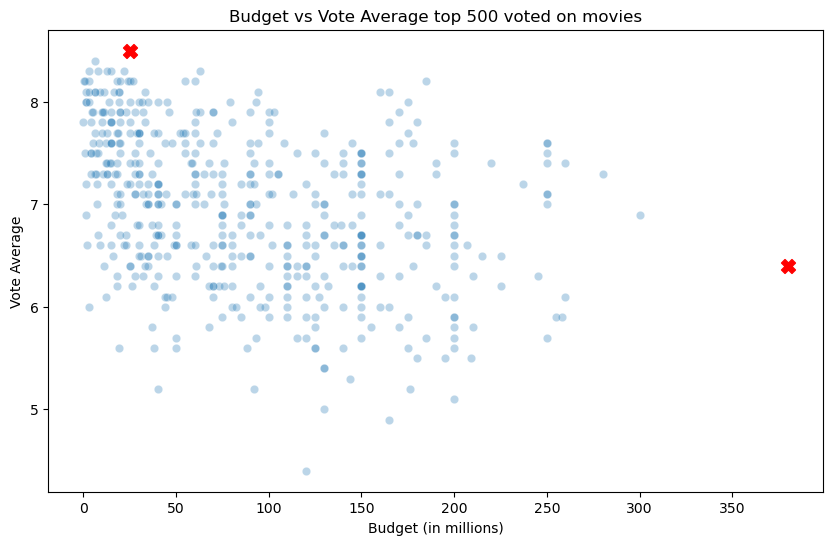

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=movies_pop, 
    x='budget_M', 
    y='vote_average', 
    alpha=0.3)

#done after plotting graph, we wanna highlight our special movies
highlight = movies_pop[movies_pop['id'].isin([1865, 278])]  

#scatter again but this time using out relection
plt.scatter(
    x=highlight['budget_M'], 
    y=highlight['vote_average'],
    color='red',  
    s=100,  
    label='Highlighted', 
    marker='X'  
)
plt.title('Budget vs Vote Average top 500 voted on movies')
plt.xlabel('Budget (in millions)')
plt.ylabel('Vote Average')

#save for visualisatioon later on 
plt.savefig('images/budget_scatter.jpg', dpi=300, bbox_inches='tight')


In [151]:
most_liked = movies_pop.sort_values('vote_average', ascending = False).head(1) #extract interesting movie
most_liked_id = most_liked[['id']].iloc[0,0]    #grab it's id
most_liked_id
print(most_liked['title'])          #start printing info about it

df_sorted = df.sort_values(by='popularity', ascending=False).reset_index(drop = True)   #create a popularity ranking
print("Rank in popularity: ", df_sorted[df_sorted['id'] == most_liked_id].index[0])     #grab where our special id falls

genres = most_liked['genre_extract'].values[0] #grab the genres
print("Genre: ", genres)

studios = most_liked['production_companies_extract'].values[0] #grab studio
print("Studio: ", studios)

print("Budget M: ", most_liked['budget_M'].values[0])   #grab budget
print("Tagline: ", most_liked['tagline'].values[0])     #grab tagline for vis
print("Tagline: ", most_liked['release_date'].values[0])     #grab tagline for vis


19    The Shawshank Redemption
Name: title, dtype: object
Rank in popularity:  34
Genre:  ['Drama', 'Crime']
Studio:  ['Castle Rock Entertainment']
Budget M:  25.0
Tagline:  Fear can hold you prisoner. Hope can set you free.
Tagline:  1994-09-23T00:00:00.000000000


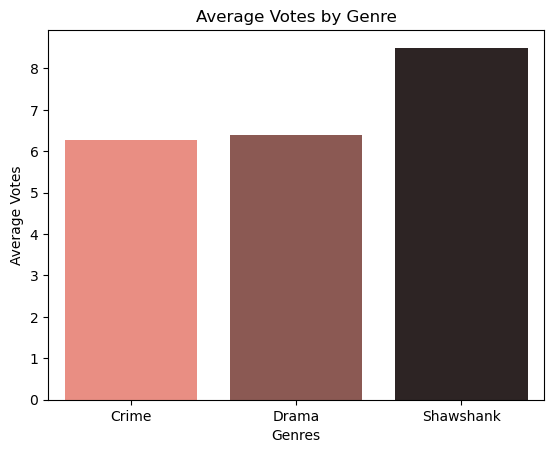

In [70]:
#Wanna explore how this movie compares across other genres, is it normal? a standout?

df_cre = df.explode('genre_extract')   #creates from an itinerable list separate rows. So a lot of duplicates except for the genre it is under 
df_cre = df_cre[df_cre['genre_extract'].isin(['Drama', 'Crime'])]   #grab only genres shared with shawshank

#pivots sum, and aggregate data. So no need to make multiple dfs
#index = defines rows of picot tables
#values = column that we will aggregate
#how are we aggregating
#based on genre we want the mean voting average
cre = df_cre.pivot_table(index='genre_extract', values='vote_average', aggfunc='mean')
cre.reset_index(inplace=True)
new_row = pd.DataFrame({        #our special movie row we add 
    'genre_extract': ['Shawshank'],  
    'vote_average': 8.5  
})
cre = pd.concat([cre, new_row], ignore_index=True)  #join the df
cre['genre_extract'] = ['Crime', 'Drama', 'Shawshank']  #rename rows 
cre


#plot bar chart of the average genre vs shawshank
sns.barplot(
    data=cre, 
    x='genre_extract', 
    y='vote_average', 
    palette='dark:salmon_r', 
    hue='genre_extract'
)

plt.xlabel('Genres')
plt.ylabel('Average Votes')
plt.title('Average Votes by Genre')
plt.savefig('images/shawshanks.jpg', dpi=300, bbox_inches='tight')


Outlier 

In [156]:
#do the same code but now for most expensive
most_expensive = movies_pop.sort_values('budget', ascending = False).head(1)
most_expensive_id = most_expensive[['id']].iloc[0,0]
print(most_expensive['title'])


df_sorted = df.sort_values(by='popularity', ascending=False).reset_index(drop = True)  
print("Rank in popularity: ", df_sorted[df_sorted['id'] == most_expensive_id].index[0])

genres = most_expensive['genre_extract'].values[0]
print("Genre: ", genres)

studios = most_expensive['production_companies_extract'].values[0]
print("Studio: ", studios)

print("Budget M: ", most_expensive['budget_M'].values[0])
print("Tagline: ", most_expensive['tagline'].values[0])
print("Release Date: ", most_expensive['release_date'].values[0])

most_expensive


86    Pirates of the Caribbean: On Stranger Tides
Name: title, dtype: object
Rank in popularity:  35
Genre:  ['Adventure', 'Action', 'Fantasy']
Studio:  ['Walt Disney Pictures', 'Jerry Bruckheimer Films', 'Moving Picture Company (MPC)']
Budget M:  380.0
Tagline:  Live Forever Or Die Trying.
Release Date:  2011-05-14T00:00:00.000000000


,id,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,tagline,title,vote_average,vote_count,genre_extract,keywords_extract,production_companies_extract,production_countries_extract,spoken_languages_extract,budget_M
86,1865,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,"[Adventure, Action, Fantasy]","[sea, captain, mutiny, sword, prime minister, ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[US],"[en, es]",380.0


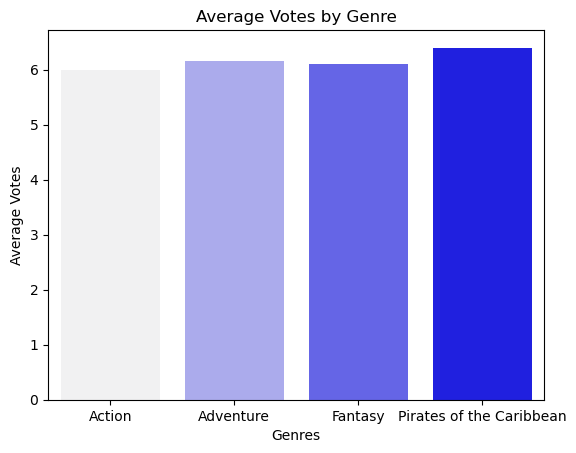

In [75]:
df_pir = df.explode('genre_extract')
df_pir = df_pir[df_pir['genre_extract'].isin(['Adventure', 'Action', 'Fantasy'])]

pir = df_pir.pivot_table(index='genre_extract', values='vote_average', aggfunc='mean')
pir.reset_index(inplace=True)
new_row = pd.DataFrame({
    'genre_extract': ['Pirates of the Caribbean'],  # You can name this row anything
    'vote_average': 6.4  # Add the average_vote value
})
pir = pd.concat([pir, new_row], ignore_index=True)
# cre['genre_extract'] = ['Crime', 'Drama', 'Shawshank']
pir


sns.barplot(
    data=pir, 
    x='genre_extract', 
    y='vote_average', 
    palette='light:b', 
    hue='genre_extract'
)

plt.xlabel('Genres')
plt.ylabel('Average Votes')
plt.title('Average Votes by Genre')
plt.savefig('images/pirates.jpg', dpi=300, bbox_inches='tight')

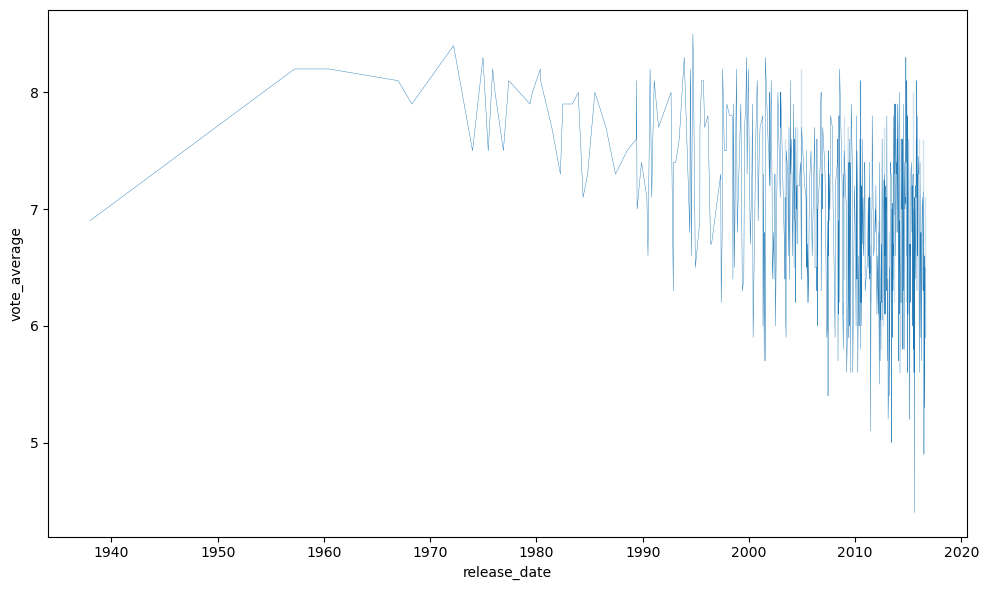

In [161]:
movies_pop_time = movies_pop.sort_values(by='release_date')

fig, ax1 = plt.subplots(figsize=(10, 6))
#time tine of average scors given 
sns.lineplot(
    data=movies_pop_time, 
    x='release_date', 
    y='vote_average', 
    linewidth=.3,
)

plt.tight_layout()
plt.savefig('images/time_vote.jpg', dpi=300, bbox_inches='tight')

## Visualisation 

Start of general! 
Is throwing more money at a project actually worth it? Or is it not really relevant?

<div style="text-align: center;">
<img src="images/budget_scatter.jpg" width="900px" />
</div>
<br>
<h1> Movies more accessible do we just expect more now? </h1>
<br>
<div style="text-align: center;">
<img src="images/time_vote.jpg" width="900px" />
</div>

<div style="background-color: #e6c3ac; padding: 20px;">
<h1 style="text-align: center;">The Shawshank Redemption</h1>
<p style="text-align: center; font-size: 2em; font-style: italic;">"Fear can hold you prisoner. Hope can set you free"</p>
<table>
  <tr>
    <td>
      <img src="https://images.pexels.com/photos/1309902/pexels-photo-1309902.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" style="width: 700px;" alt="Shawshank" />
    </td>
    <td>
      <p><strong>Popularity:</strong> <br><span style="font-size: 2em;">#34</span></p>
      <p><strong>Genre:</strong> <br><span style="font-size: 2em;">Drama, Crime</span></p>
      <p><strong>Studio:</strong> <br><span style="font-size: 2em;">Castle Rock Entertainment</span></p>
      <p><strong>Budget:</strong> <br><span style="font-size: 2em;">$25.0 Million</span></p>
      <p><strong>Release Year:</strong> <br><span style="font-size: 2em;">1994</span></p>
    </td>
  </tr>
</table>
  <div style="text-align: center;">
    <img src="images/shawshanks.jpg" width="700px" />
</div>
</div>

<div style="background-color: lightblue; padding: 20px;">
<h1 style="text-align: center;">Pirates of the Caribbean: On Stranger Tides</h1>
<p style="text-align: center; font-size: 2em; font-style: italic;">"Live Forever Or Die Trying"</p>
<table>
  <tr>
    <td>
      <img src="https://images.pexels.com/photos/37859/sailing-ship-vessel-boat-sea-37859.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" style="width: 700px;" alt="Movie Image" />
    </td>
    <td>
      <p><strong>Popularity:</strong> <br><span style="font-size: 2em;">#35</span></p>
      <p><strong>Genre:</strong> <br><span style="font-size: 2em;">Adventure, Action, Fantasy</span></p>
      <p><strong>Studio:</strong> <br><span style="font-size: 2em;">Walt Disney Pictures <br> Jerry Bruckheimer Films <br> Moving Picture Company (MPC)</span></p>
      <p><strong>Budget:</strong> <br><span style="font-size: 2em;">$380.0 Million</span></p>
        <p><strong>Year:</strong> <br><span style="font-size: 2em;">2011</span></p>
    </td>
  </tr>
</table>
     <div style="text-align: center;">
    <img src="images/pirates.jpg" width="700px" />
</div>
</div>

# Budget Per Genre

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

## Getting the data 


In [85]:
movies_budget = df.copy()


movies_budget_exploded = movies_budget.explode('genre_extract') #separate the genre into rows

#for each genre, what is the mean budget
pivot_table_budget = movies_budget_exploded.pivot_table(index='genre_extract', values='budget', aggfunc='mean')
pivot_table_budget.reset_index(inplace=True)
pivot_table_budget = pivot_table_budget.round(2)    #easy visualisation
pivot_table_budget['budget_M'] = (pivot_table_budget['budget'] / 1e6).round(1) #not dealing with funcformatter
pivot_table_budget = pivot_table_budget.sort_values('budget_M', ascending = True)   #sort so it is easier to analyse
pivot_table_budget


,genre_extract,budget,budget_M
9,Foreign,658088.44,0.7
16,TV Movie,1150000.00,1.2
5,Documentary,2693969.66,2.7
11,Horror,14574030.81,14.6
12,Music,15907947.54,15.9
14,Romance,20311362.13,20.3
6,Drama,20680797.98,20.7
3,Comedy,25313421.49,25.3
19,Western,27078702.45,27.1
4,Crime,27849808.15,27.8


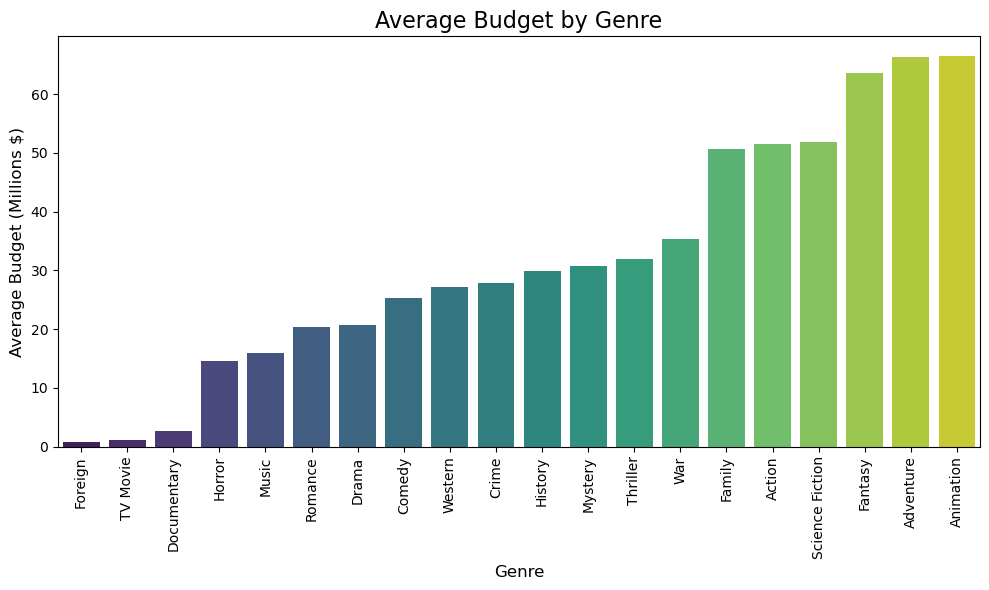

In [86]:
#bar chart for average budget per genre
plt.figure(figsize=(10, 6))
sns.barplot(
    x='genre_extract', 
    y='budget_M', 
    data=pivot_table_budget, 
    palette='viridis',
    hue = 'genre_extract'
)



plt.title('Average Budget by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Budget (Millions $)', fontsize=12)    
plt.xticks(rotation=90)  

plt.tight_layout()
plt.savefig('images/budget_genre.jpg', dpi=300, bbox_inches='tight')

## Visualisation

<div style="text-align: center;">
    <img src="images/budget_genre.jpg" width="900px" />
</div>


<b> WOW top 5 </b>

# Genre Popularity Based on Country

## Getting the data 

In [166]:
movies_gc = df.copy()

movies_exploded = movies_gc.explode('production_countries_extract').explode('genre_extract') #explode twice so we get all countries in a new row and genre per usual
# First off we group by country, second by genre, then we collect how many rows (the size of these are. e.g)
# production_countries_extract  genre_extract  
# AE                            Action              2
#                               Adventure           1
#                               Comedy              3
#                               Crime               1
#                               Drama              10
country_genre_counts = movies_exploded.groupby(['production_countries_extract', 'genre_extract']).size()    
print(country_genre_counts) #checking how it looks like
country_genre_counts = country_genre_counts.reset_index(name='count') #change the size to be a easier name to unserstand

#for each with countries as rows, column as genre, the value i want to use count and SUM these values 
#if nothing there then give me a 0
pivot_table = country_genre_counts.pivot_table(index='production_countries_extract', 
                                               columns='genre_extract', 
                                               values='count', 
                                               aggfunc='sum', 
                                               fill_value=0
                                              )
pivot_table['Total'] = pivot_table.sum(axis=1)          #total so we can calculate the percentage and make it more useful since then the US would just plow the other countries into a tini tiny crumb 
print(pivot_table.head())
top_20_countries = pivot_table.sort_values(by='Total', ascending=False).head(15)    #get top 15 countries!

#for each value we are conna extract the total
# ensure the division happens row-wise, we use values[:, None]
# reshapes array into 2d so we are porper aligned. You can use div apparently but this seemes easier 
top_20_table_percentage = top_20_countries / top_20_countries['Total'].values[:, None] * 100

production_countries_extract  genre_extract  
AE                            Action              2
                              Adventure           1
                              Comedy              3
                              Crime               1
                              Drama              10
                                                 ..
ZA                            History             3
                              Romance             3
                              Science Fiction     4
                              Thriller            4
                              War                 1
Length: 705, dtype: int64
genre_extract                 Action  Adventure  Animation  Comedy  Crime  \
production_countries_extract                                                
AE                                 2          1          0       3      1   
AF                                 0          0          0       0      0   
AO                                 0          0 

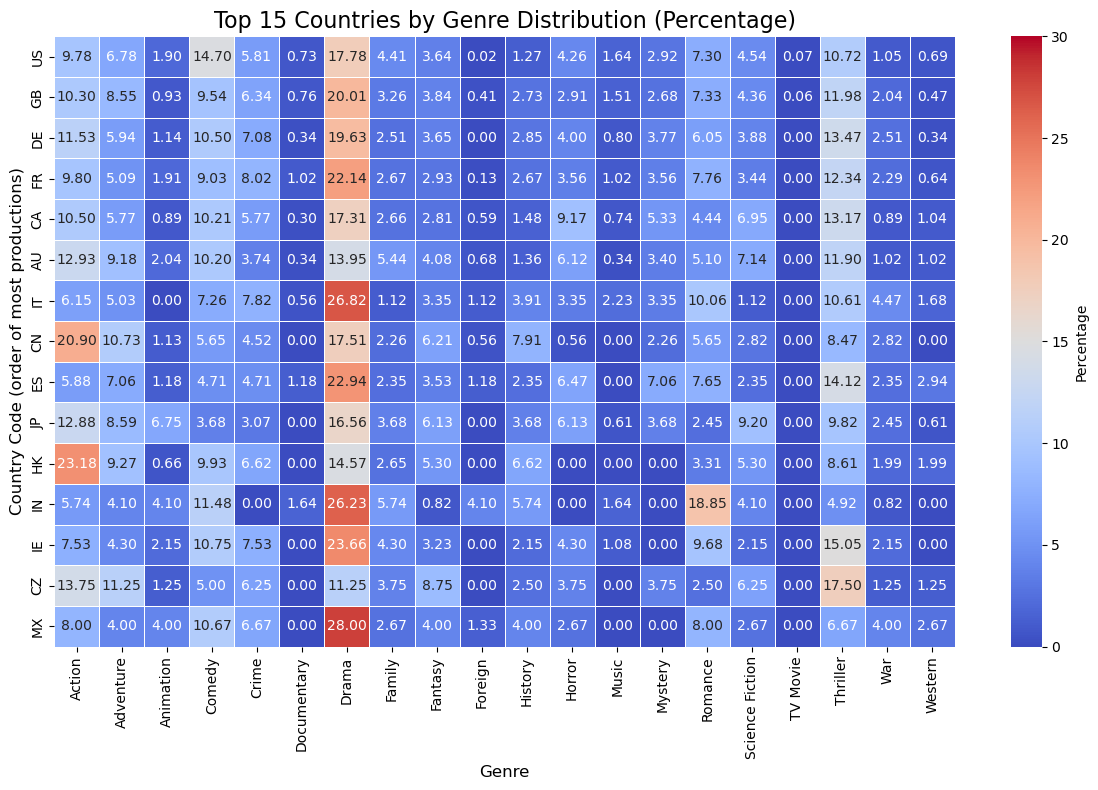

In [95]:
top_20_table_percentage = top_20_table_percentage.drop(columns=['Total']) #no longer useful so we drop it
plt.figure(figsize=(12, 8))  

sns.heatmap(
    data= top_20_table_percentage, 
    annot=True, 
    fmt='.2f', 
    cmap ='coolwarm', 
    cbar_kws={'label': 'Percentage'}, 
    linewidths=0.5,
    vmax=30     #specify max
)

plt.title('Top 15 Countries by Genre Distribution (Percentage)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country Code (order of most productions)', fontsize=12)


plt.tight_layout()  
plt.savefig('images/countries_genre.jpg', dpi=300, bbox_inches='tight')

## Visualisation

<div style="text-align: center;">
    <img src="images/countries_genre.jpg" width="1000px" />
</div>